In [16]:
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, recall_score,precision_score, accuracy_score
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from models import ConvNet
from eva
# from train import Convtrain

plt.rcParams['figure.dpi'] = 300

ImportError: cannot import name 'data_loader' from 'models' (D:\HUDAN_FYP\tBLG\2DMaterials\models.py)

In [2]:
# Load data
filename = 'Raw_2DMaterials'
trainset = pd.read_table("./Dataset/" + filename + ".csv", delimiter=";", header=0, index_col=None)
X, Y = np.array(trainset.iloc[:, 0:-1]), np.array(trainset.iloc[:, -1])
Y = Y.astype('int')

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, stratify=Y, test_size=0.25, random_state=1)

# Convert data to PyTorch tensors
xtrain_tensor = torch.Tensor(xtrain)
ytrain_tensor = torch.LongTensor(ytrain)
xtest_tensor = torch.Tensor(xtest)
ytest_tensor = torch.LongTensor(ytest)

# Create DataLoader
train_dataset = TensorDataset(xtrain_tensor, ytrain_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Instantiate the model
input_size = xtrain.shape[1]
model = ConvNet(input_size)
model

ConvNet(
  (conv1): Conv1d(1, 32, kernel_size=(3,), stride=(2,))
  (batchnorm1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leakyrelu1): LeakyReLU(negative_slope=0.01)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(2,))
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leakyrelu2): LeakyReLU(negative_slope=0.01)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(2,))
  (batchnorm3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leakyrelu3): LeakyReLU(negative_slope=0.01)
  (conv4): Conv1d(128, 256, kernel_size=(3,), stride=(2,))
  (batchnorm4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leakyrelu4): LeakyReLU(negative_slope=0.01)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=13312, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [3]:
def Convtrain(input_size, train_loader, xtest_tensor, ytest_tensor, filename):
    model = ConvNet(input_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    num_epochs = 100
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # # Print training statistics
        # # model.eval()
        # # with torch.no_grad():
        # #     outputs = model(xtest_tensor)
        # #     _, predicted = torch.max(outputs, 1)
        # #     accuracy = (predicted == ytest_tensor).sum().item() / len(ytest_tensor)
        # #     print(f"Epoch {epoch + 1}/100 - loss: {loss.item():.4f} - accuracy: {accuracy:.4f}")
        # model.eval()
        # with torch.no_grad():
        #     val_outputs = model(xtest_tensor)
        #     val_loss = criterion(val_outputs, ytest_tensor)
        #
        # print(f"Epoch {epoch + 1}/{num_epochs} - loss: {loss.item():.4f} - val_loss: {val_loss.item():.4f}")
        #
        # # Save the model
        # if epoch % 100 == 0:  # Save the model every 10 epochs (adjust as needed)
        #     torch.save(model.state_dict(), save_path)

        model.eval()
        with torch.no_grad():
            outputs = model(xtest_tensor)
            _, predicted = torch.max(outputs, 1)
            accuracy = (predicted == ytest_tensor).sum().item() / len(ytest_tensor)
            print(f"Epoch {epoch + 1}/100 - loss: {loss.item():.4f} - accuracy: {accuracy:.4f}")

        # Save the model
        if epoch % 10 == 0:
            torch.save(model.state_dict(), f'./models/{filename}/model_epoch_{epoch}.pth')

Convtrain(input_size, train_loader, xtest_tensor, ytest_tensor,filename)

Epoch 1/100 - loss: 1.6481 - accuracy: 0.4564
done
Epoch 2/100 - loss: 1.6270 - accuracy: 0.4832
Epoch 3/100 - loss: 1.6033 - accuracy: 0.8121
Epoch 4/100 - loss: 1.5487 - accuracy: 0.9060
Epoch 5/100 - loss: 1.4979 - accuracy: 0.9463
Epoch 6/100 - loss: 1.5277 - accuracy: 0.9463
Epoch 7/100 - loss: 1.4659 - accuracy: 0.9597
Epoch 8/100 - loss: 1.4619 - accuracy: 0.9597
Epoch 9/100 - loss: 1.4618 - accuracy: 0.9664
Epoch 10/100 - loss: 1.4968 - accuracy: 0.9597
Epoch 11/100 - loss: 1.4965 - accuracy: 0.9597
done
Epoch 12/100 - loss: 1.4616 - accuracy: 0.9597
Epoch 13/100 - loss: 1.4628 - accuracy: 0.9664
Epoch 14/100 - loss: 1.5054 - accuracy: 0.9664
Epoch 15/100 - loss: 1.4639 - accuracy: 0.9597
Epoch 16/100 - loss: 1.4943 - accuracy: 0.9664
Epoch 17/100 - loss: 1.4942 - accuracy: 0.9664
Epoch 18/100 - loss: 1.4803 - accuracy: 0.9732
Epoch 19/100 - loss: 1.4615 - accuracy: 0.9732
Epoch 20/100 - loss: 1.4615 - accuracy: 0.9799
Epoch 21/100 - loss: 1.4621 - accuracy: 0.9799
done
Epoch 2

In [4]:
checkpoint_filepath = f'./models/{filename}/model_epoch_100.pth'
model.load_state_dict(torch.load(checkpoint_filepath))
model.eval()

# Convert data to PyTorch tensors
xtest_tensor = torch.Tensor(xtest)
ytest_tensor = torch.LongTensor(ytest)

# Forward pass
with torch.no_grad():
    outputs = model(xtest_tensor)
    _, predicted = torch.max(outputs, 1)

# Convert predictions to numpy array
y_preds_ready = predicted.numpy()

# Calculate metrics
recall = recall_score(ytest, y_preds_ready, average='macro')
precision = precision_score(ytest, y_preds_ready, average='macro')

print("Recall:", recall)
print("Precision:", precision)


Recall: 0.8357142857142857
Precision: 0.8638095238095238


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
avg_precision = precision_score(ytest, y_preds_ready, average='macro')
avg_recall = recall_score(ytest, y_preds_ready, average='macro')
avg_accuracy = accuracy_score(ytest, y_preds_ready,)
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average accuracy: {avg_accuracy}")

Average Precision: 0.8638095238095238
Average Recall: 0.8357142857142857
Average accuracy: 0.9798657718120806


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(7,7), text_size=8):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm_norm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm_norm[i, j]*100:.1f}%",
             horizontalalignment="center",
             size=text_size)

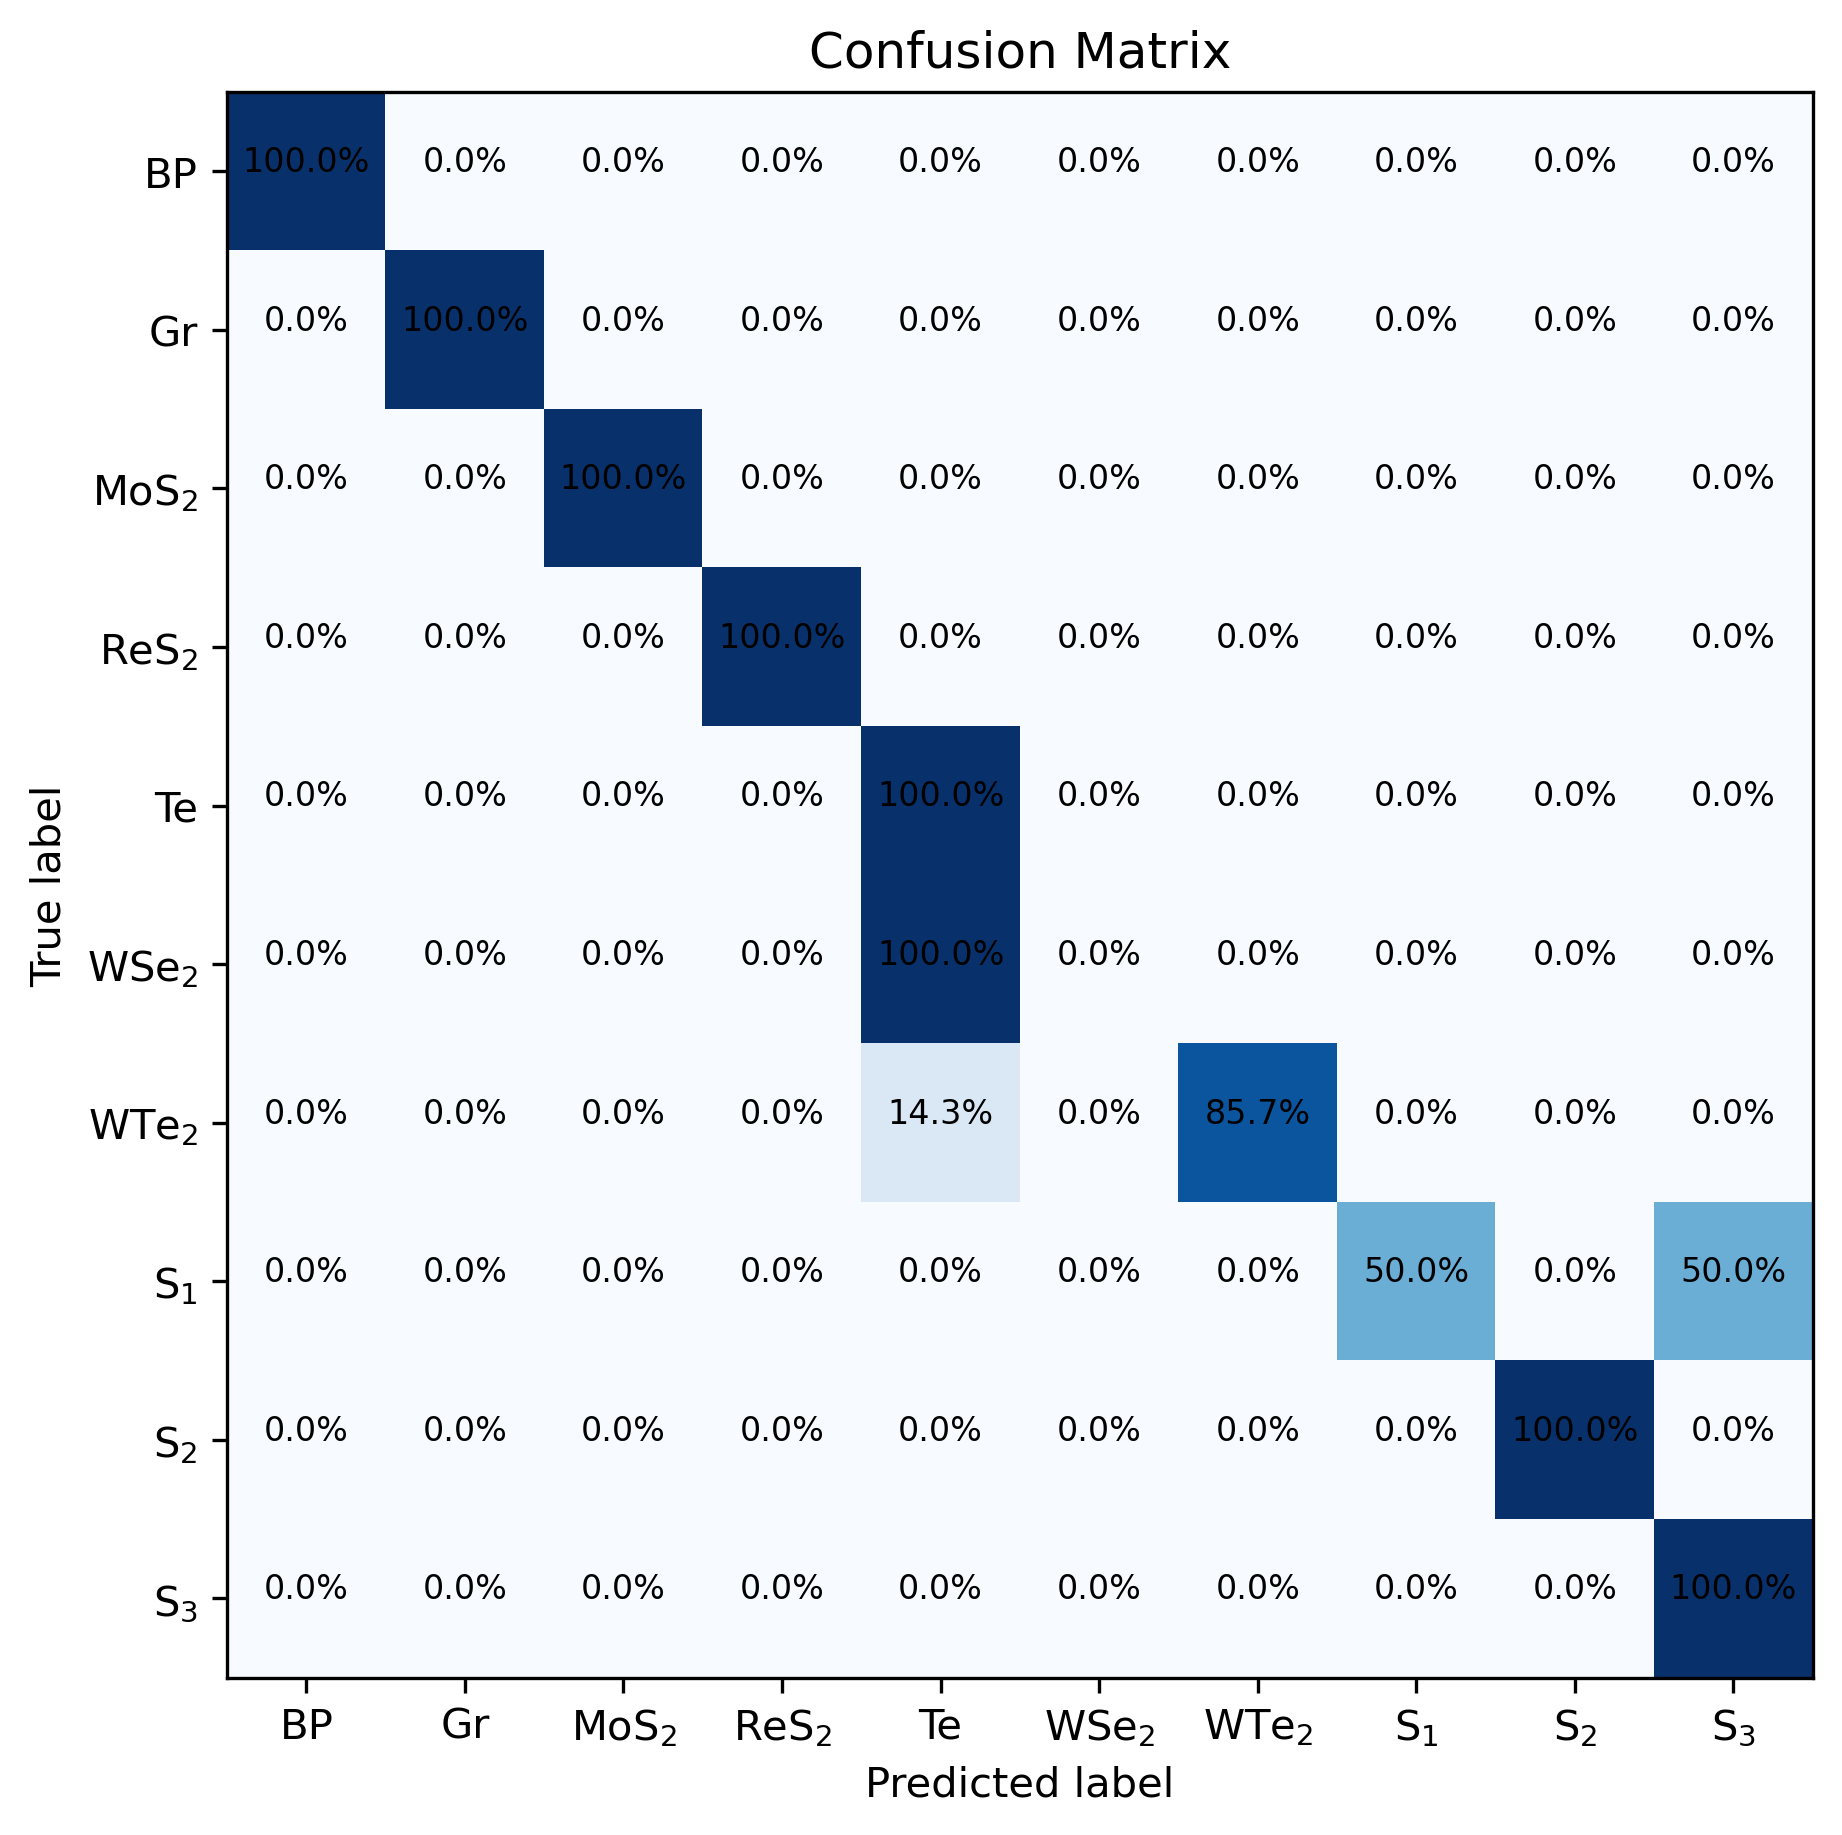

In [11]:
make_confusion_matrix(y_true=ytest,
                      y_pred=y_preds_ready,
                      classes=['BP','Gr','MoS$_2$','ReS$_2$','Te','WSe$_2$','WTe$_2$','S$_1$','S$_2$','S$_3$']
                     )

In [12]:
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(cm, classes=None, figsize=(7,7), text_size=8):
    """Makes a labelled confusion matrix plot from a given confusion matrix.

    Args:
        cm: Precomputed confusion matrix.
        classes: Array of class labels (e.g., string form). If `None`, integer labels are used.
        figsize: Size of output figure (default=(10, 10)).
        text_size: Size of output figure text (default=15).

    Returns:
        A labelled confusion matrix plot.

    Example usage:
        make_confusion_matrix(cm, classes=class_names, figsize=(15, 15), text_size=10)
    """
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm_norm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm_norm[i, j]*100:.1f}%",
                 horizontalalignment="center",
                 color="white" if cm_norm[i, j] > threshold else "black",
                 size=text_size)

    plt.show()

def ready_model():
    model_train = model()
    return model_train


def get_model_name(k, name):
    return 'model_'+name+str(k)+'.h5'

def KFoldcnn(filename):
    num=10
    kfold = KFold(n_splits=num, shuffle=True)
    trainset = pd.read_table('./Dataset/2D/'+filename +'.csv',delimiter=";", header = 0)
    X, Y = np.array(trainset.iloc[:,0:-1]),np.array(trainset.iloc[:,-1])
    Y=Y.astype('int')


    name = "crossval"
    accuracy = []
    recall = []
    precision = []
    sum_conf_matrix = np.zeros((10, 10))
    fold_no = 1
    for train, test  in kfold.split(X, Y):
        train_model = ready_model()
        train_model.compile(optimizer = Adam(learning_rate=0.0001),
                            loss = SparseCategoricalCrossentropy(),
                            metrics = ['accuracy'])
        print(f'training fold number {fold_no}')

        save_dir = './models/KFold/'+ filename +'crossval/'
        checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_no, name),
                monitor='val_accuracy', verbose=1,
                save_best_only=True, mode='max')

        callbacks_list = [checkpoint]

        history = train_model.fit(X[train], Y[train], epochs = 100,
                                validation_data = (X[test], Y[test]),
                                batch_size = 32,
                                callbacks = callbacks_list,
                                verbose = 0)


        train_model.load_weights(save_dir+get_model_name(fold_no, name))
        scores = train_model.evaluate(X[test], Y[test], verbose=0)
        accuracy.append(scores[1])
        y_pred = train_model.predict(X[test])
        y_preds_ready = y_pred.argmax(axis=1)
        recall.append(recall_score(Y[test], y_preds_ready, average='macro'))
        precision.append(precision_score(Y[test], y_preds_ready, average='macro'))
        conf_matrix = confusion_matrix(Y[test], y_preds_ready, labels=list(range(10)))
        sum_conf_matrix += conf_matrix
        fold_no+=1

    print("Score per fold:")
    for i in range(num):
        print(f'Fold {i + 1} - Accuracy: {accuracy[i] * 100}%, Recall: {recall[i] * 100}%, Precision: {precision[i] * 100}%')

    avg_accuracy = sum(accuracy) / len(accuracy) * 100
    avg_recall = sum(recall) / len(recall) * 100
    avg_precision = sum(precision) / len(precision) * 100
    print(f"Average Accuracy: {avg_accuracy}%, Average Recall: {avg_recall}%, Average Precision: {avg_precision}%")


    avg_conf_matrix = sum_conf_matrix / 10
    print('Average Confusion Matrix:')
    make_confusion_matrix(avg_conf_matrix, classes=['BP', 'Gr', 'MoS$_2$', 'ReS$_2$', 'Te', 'WSe$_2$', 'WTe$_2$', 'S$_1$', 'S$_2$', 'S$_3$'])



In [13]:
KFoldcnn('2Draw1119')

TypeError: forward() missing 1 required positional argument: 'x'